# Web Scraping Project:



### Objectives: 
Scarpe book data from [Book to Scarpe](https://books.toscrape.com/index.html)(a static demo website for scraping purpose). 

### Extracted Fields:
<b>Title: </b> Name of each book.<br>
<b>Price: </b> Price of the book in GBP(£).<br>
<b>Ratings: </b> Stars given to the book out of 5.

### Tools Used:
**requests** – For sending HTTP requests<br>
**BeautifulSoup** – For parsing HTML content<br>
**lxml** – Fast HTML parser<br>
**pandas** - To do further analysis

###  Fetching Book Data from  Book to Scarpe Website Using BeautifulSoup


In [19]:
# importing requests and Beautifulsoup 
import requests
from bs4 import BeautifulSoup

In [20]:
# Creating titles list for storing the titles of each book
titles = []
# creating titles list for storing prices of the books
prices=[]
# creating titles list for storing ratings of the books
ratings=[]

In [21]:
for i in range(1,51):
    # Looping through pages 1 to 50 to scrape data from each
    url = "https://books.toscrape.com/catalogue/page-"+str(i)+".html"
    response = requests.get(url)  # Sending request to the current page
    soup = BeautifulSoup(response.text, 'lxml')  # Parsing HTML content using lxml parser
    books = soup.find_all("li",class_="col-xs-6 col-sm-4 col-md-3 col-lg-3")  # Finding all book blocks on the page
    
    # Looping through each book block to extract details
    for book in books:
        name = book.h3.a['title']  # Extracting book title from the anchor tag
        titles.append(name)  # Adding title to the titles list
        price = book.find("p", class_="price_color").text  # Extracting price from the price_color paragraph
        prices.append(price)  # Adding price to the prices list
        rating = book.find("p", class_="star-rating")['class'][1]  # Extracting rating from the class list
        ratings.append(rating)  # Adding rating to the ratings list
        
print(titles)  # Displaying all scraped titles
print(prices)  # Displaying all scraped prices
print(ratings)  # Displaying all scraped ratings


['A Light in the Attic', 'Tipping the Velvet', 'Soumission', 'Sharp Objects', 'Sapiens: A Brief History of Humankind', 'The Requiem Red', 'The Dirty Little Secrets of Getting Your Dream Job', 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull', 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics', 'The Black Maria', 'Starving Hearts (Triangular Trade Trilogy, #1)', "Shakespeare's Sonnets", 'Set Me Free', "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)", 'Rip it Up and Start Again', 'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991', 'Olio', 'Mesaerion: The Best Science Fiction Stories 1800-1849', 'Libertarianism for Beginners', "It's Only the Himalayas", 'In Her Wake', 'How Music Works', 'Foolproof Preserving: A Guide to Small Batch Jams, Jellies, Pickles, Condiments, and More: A Foolproof Guide to Making Small Batch Jams, Jellies, Pickles, Condiments, and More',

Scraped data was structured into a pandas DataFrame for easy analysis.

###  Creating DataFrame: Titles, Prices, and Ratings Extracted

In [27]:
# importing pandas library
import pandas as pd
# Creating DataFrame 'df' with Titles, Prices, and Ratings columns
df = pd.DataFrame({"Titels":titles,"Prices":prices,"Ratings":ratings})

In [29]:
df

,Titels,Prices,Ratings
0,A Light in the Attic,Â£51.77,Three
1,Tipping the Velvet,Â£53.74,One
2,Soumission,Â£50.10,One
3,Sharp Objects,Â£47.82,Four
4,Sapiens: A Brief History of Humankind,Â£54.23,Five
...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,Â£55.53,One
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Â£57.06,Four
997,A Spy's Devotion (The Regency Spies of London #1),Â£16.97,Five
998,1st to Die (Women's Murder Club #1),Â£53.98,One


###  Data Formatting: Converting Price and Rating to Numeric Format


In [32]:
df["Prices"]=df["Prices"].str.replace("Â£","").astype(float)
df["Ratings"] = df["Ratings"].map({"One":1,"Two":2,"Three":3,"Four":4,"Five":5})
df

,Titels,Prices,Ratings
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5
...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,1
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,4
997,A Spy's Devotion (The Regency Spies of London #1),16.97,5
998,1st to Die (Women's Murder Club #1),53.98,1


### Summary Statistics: Price and Rating Distribution Overview

In [35]:
df.describe()

,Prices,Ratings
count,1000.00000,1000.000000
mean,35.07035,2.923000
std,14.44669,1.434967
min,10.00000,1.000000
25%,22.10750,2.000000
50%,35.98000,3.000000
75%,47.45750,4.000000
max,59.99000,5.000000


Prices range from £10 to £59.99 with an average around £35, while ratings span from 1 to 5 stars, centered near 3—indicating moderate pricing and balanced user feedback across books.

###  Visualization: Bar Chart Showing Frequency of Book Ratings

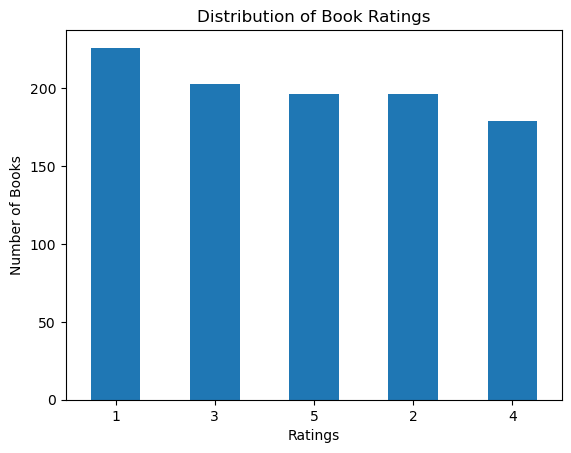

In [39]:
import matplotlib.pyplot as plt
df["Ratings"].value_counts().plot(kind='bar')
plt.xlabel('Ratings')
plt.ylabel('Number of Books')
plt.title('Distribution of Book Ratings')
plt.xticks(rotation=0)
plt.show()


From the above bar chart we can conclude that book ratings are fairly balanced across all levels, indicating a diverse mix of popular and less-liked titles in the store.


### Correlation Between Book Prices and Ratings

In [43]:
df["Prices"].corr(df["Ratings"])

0.028166239485872976

The correlation coefficient is approximately 0.028, indicating a very weak positive relationship—book prices and ratings are almost independent of each other.

### Exporting DataFrame to CSV File

In [51]:
df.to_csv("D:Downloads/books_store_data.csv", index=True)

The data of books is stored as a csv file in my folder at the  given path.